In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

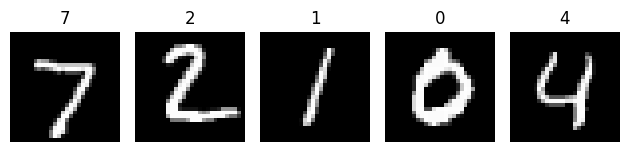

In [21]:
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(test_images[i-1], cmap='gray')
    plt.title(test_labels[i-1])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model

In [15]:
model = create_cnn_model()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8968 - loss: 0.3274 - val_accuracy: 0.9856 - val_loss: 0.0446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9852 - loss: 0.0478 - val_accuracy: 0.9878 - val_loss: 0.0361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9852 - val_loss: 0.0407
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9911 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9945 - loss: 0.0187 - val_accuracy: 0.9844 - val_loss: 0.0475


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [18]:
layer = model.get_layer('conv2d')
# print(layer)
filters, biases = layer.get_weights()
# print(filters, biases)

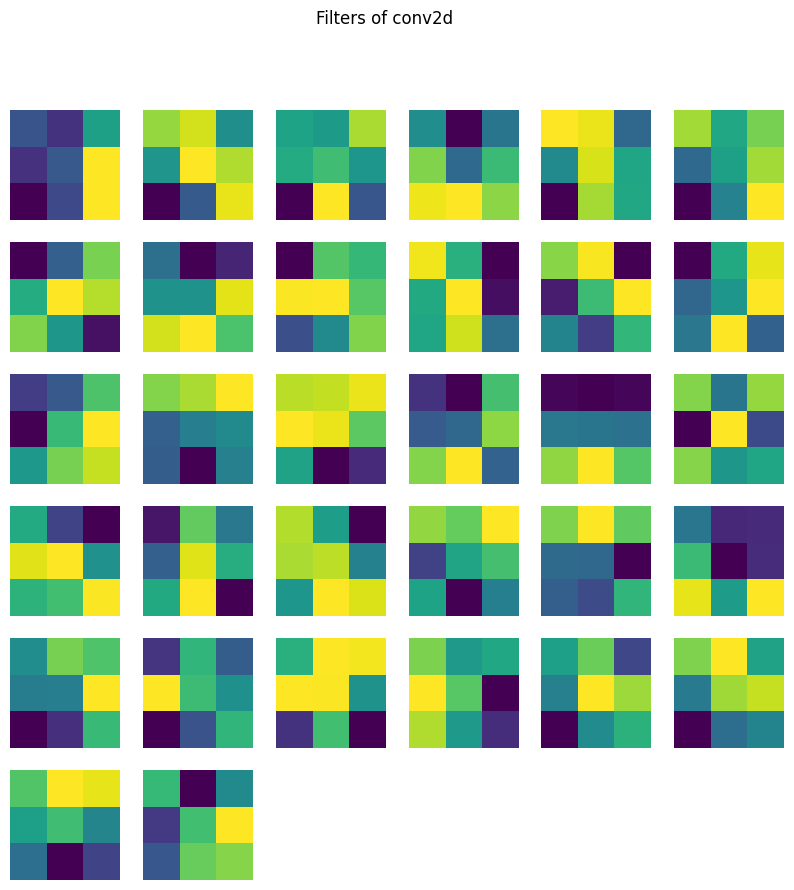

In [22]:
def visualize_layer(layer_name):
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    n_filters = filters.shape[-1]
    plt.figure(figsize=(10, 10))
    for i in range(n_filters):
        plt.subplot(6, 6, i+1)
        plt.imshow(filters[:, :, 0, i], cmap="viridis")
        plt.axis("off")
    plt.suptitle(f"Filters of {layer.name}")
    plt.show()

visualize_layer('conv2d')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


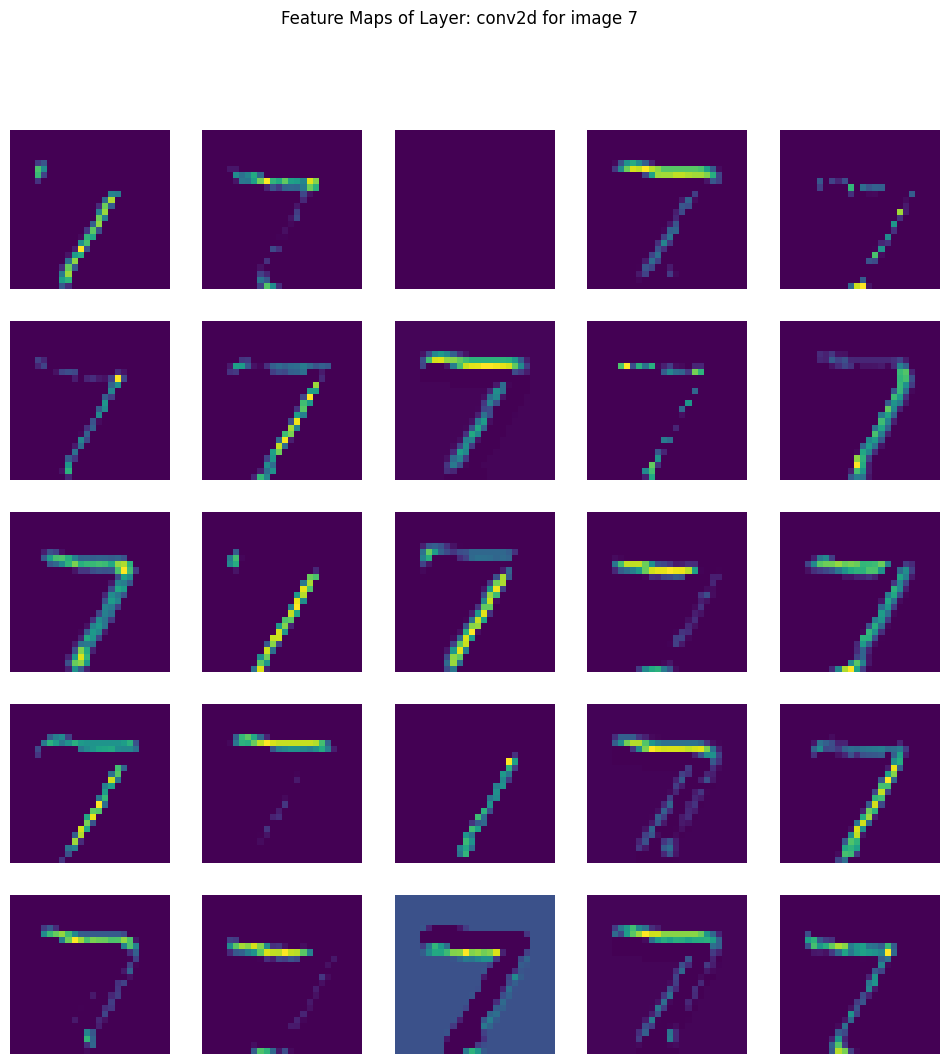

In [23]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

def visualize_feature_maps(layer_name, image_path, label):
    # image = load_img(image_path, target_size=(28, 28), color_mode="grayscale")
    # image = img_to_array(image)/ 255.0
    # image = image.reshape(1, 28, 28, 1)

    layer_output = model.get_layer(layer_name).output
    feature_map_model = Model(inputs=model.inputs, outputs=layer_output)
    # feature_maps = feature_map_model.predict(image.reshape(1, 28, 28, 1))
    feature_maps = feature_map_model.predict(image_path.reshape(1, 28, 28, 1))

    n_features = min(feature_maps.shape[-1], 25)
    square = int(np.ceil(np.sqrt(n_features)))

    plt.figure(figsize=(12, 12))
    for i in range(n_features):
        plt.subplot(square, square, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis("off")
    plt.suptitle(f"Feature Maps of Layer: {layer_name} for image {label}")
    plt.show()

visualize_feature_maps('conv2d', test_images[0], test_labels[0])
